# Data Science salaries

## Introduction


Como personas que estudian Datos, como gente que esta interesada en estudiarla, algo interesante a saber es saber al salario que uno puede aspirar.

Mi objetivo va a radicar estudiar el salario de un DataSience.

## Descripcion de las variables

El dataFrame cuenta de 12 variables distintas:

* **Work_year**: Año del que se toma en cuenta los datos
    * 2020-2024
    
* **Experience level**: Nivel de experiencia de la persona
    * Senior-Middle-Junior & en experto
    
* **Employment_type**: Duracion de la jornada laboral
    * Full time, part time, contract, freelance
    
* **Job title**: Titulacion
    * Analytics Engineer, AI Engineer...
    
* **Salary**: Salario en la moneda  local donde trabajaba el trabajador

* **Salary currency**: Es la moneda en la que esta medido el salario
    * Euros (EUR), dolares (USD), Libra esternina (GBP) (Reino Unido)
    
* **Salary in usd**: Salario medido en dolares
    
* **Employee_residence**: Lugar de residencia de cada empleado
    * Estados unidos (Us), España (Es)...

* **Remote radio**: Indica si es un trabajo remoto y cuan remoto es
    * Trabajo totalmente presencial (0),Parcialmente remoto (50), completamente remoto (100)
    
* **Company location**: Localizacion de la empresa
    * apon (JP), Estados Unidos (US), España(ES)
    
* **Company size**: Tamaño de la empresa en funcion a los ingresos y numero de trabajadores
    * S, M, L

In [118]:
mean(df.comp[df.comp$experience_level == 'SE', 7])
mean(df.comp[df.comp$experience_level == 'EX', 7])


[1] 163701

[1] 194730.2

In [113]:
unique(experience_level)

[1] "MI" "SE" "EN" "EX"

In [122]:
stats_summary <- function(df){
    # Estadisticos a tener en cuenta
    cols <- c('Min.', '1st Qu.', 'Median', 'Mean', '3rd Qu.', 'Max.', 'Sd')
    stats_table <- c()
    for (i in 1:ncol(df)){
        # Agregar el estadistico de la desv. estandar
        colstats <- c( as.vector(summary(df[, i])), sd(df[, i]) )
        stats_table <- rbind(stats_table, colstats)
    }
    # Formatear tabla de estadisticos 
    stats_table <- data.frame(stats_table, row.names = colnames(df))
    colnames(stats_table) <- cols
    stats_table <- round(stats_table, 2)
    return(stats_table)
}


box_experience <- function(df)
{
    options(repr.plot.width=20, repr.plot.height=6)
    par(mfrow = c(1, 4))
    for (i in 1:4)
        {
        lvl<- unique(experience_level)[i]
        boxplot(df[df$experience_level == lvl, 7])
        title(paste0('Nivel ', lvl))
        }    
}

box_experience_esp <- function(df)
{
    options(repr.plot.width=20, repr.plot.height=6)
    par(mfrow = c(1, 4))
    for (i in 1:4)
        {
        lvl<- unique(experience_level)[i]
        boxplot(df[df$experience_level == lvl, 5])
        title(paste0('Nivel ', lvl))
        }    
}

In [2]:
#Cargar los datos
df <- read.csv('DataScience_salaries_2024.csv')
head(df)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
2,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
3,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
4,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
5,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
6,2021,MI,FT,ML Engineer,7000000,JPY,63711,JP,50,JP,S


## Analisis univariante

In [55]:
df.comp <- df

In [57]:
attach(df.comp)

The following objects are masked from df.comp (pos = 3):

    company_location, company_size, employee_residence,
    employment_type, experience_level, job_title, remote_ratio, salary,
    salary_currency, salary_in_usd, work_year


The following objects are masked from df.comp (pos = 4):

    company_location, company_size, employee_residence,
    employment_type, experience_level, job_title, remote_ratio, salary,
    salary_currency, salary_in_usd, work_year




In [58]:
head(df.comp)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
2,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
3,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
4,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
5,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
6,2021,MI,FT,ML Engineer,7000000,JPY,63711,JP,50,JP,S


### Año

[1] "2020(0.505%)"  "2021(1.469%)"  "2022(11.134%)" "2023(57.413%)"
[5] "2024(29.478%)"

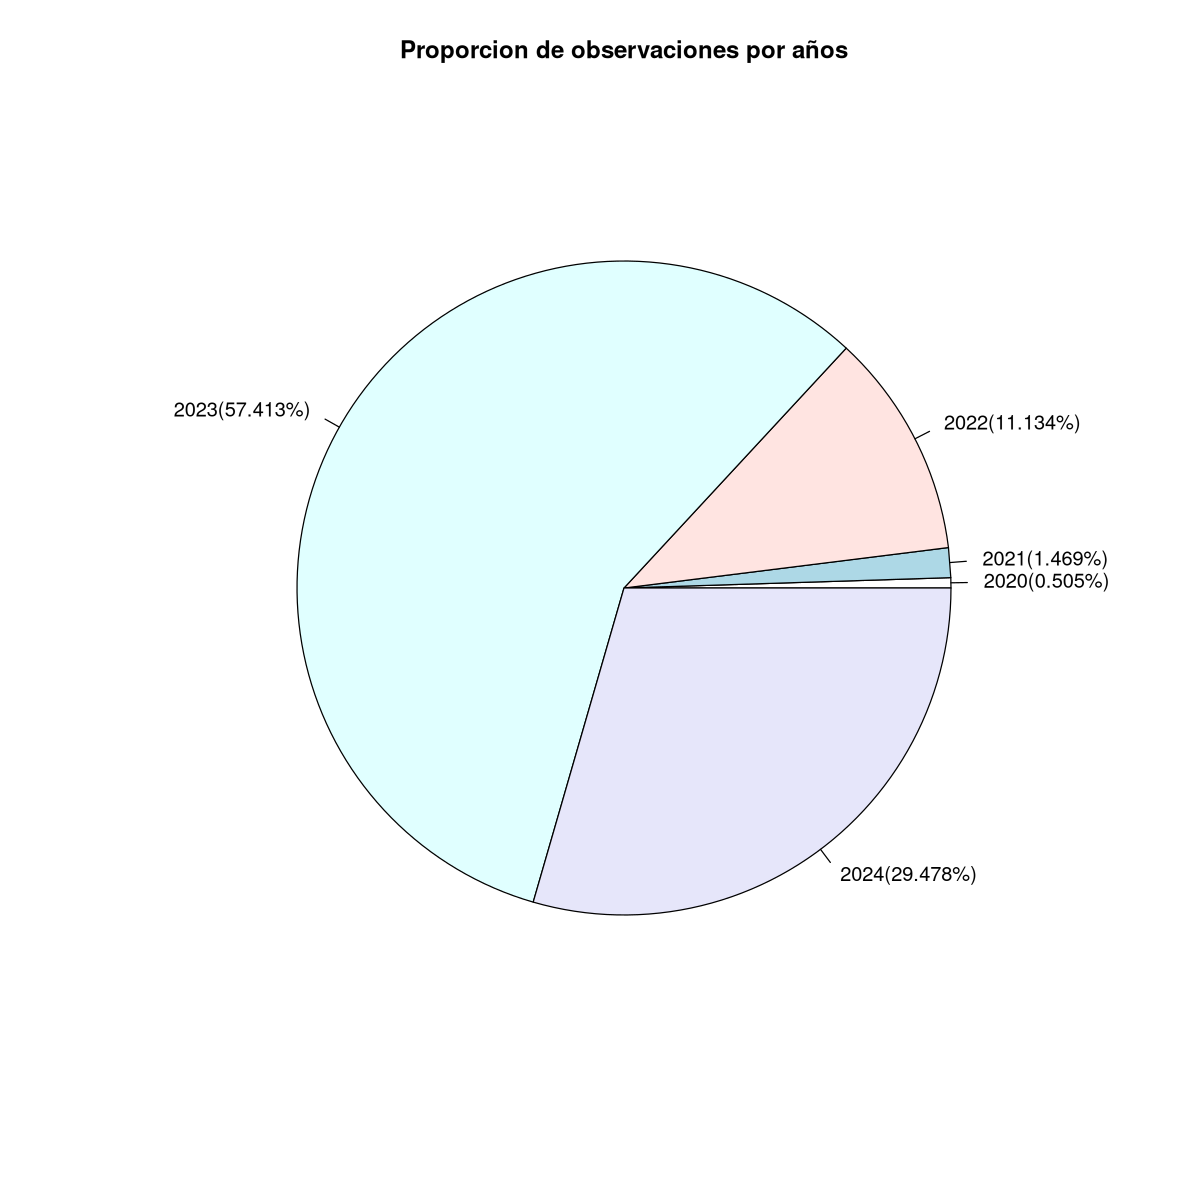

In [59]:
#Primero calculamos la proporcion del nivel de la variable categorica
options(repr.plot.width=10, repr.plot.height=10)
prop <- round(table(work_year)/length(work_year), 5)

labels <- c()
for (i in 1:length(unique(work_year))) {
    labels <- c(labels, paste0( names(prop)[i], '(', prop[i]*100, '%)') )
    }
labels
pie(table(work_year), labels = labels, radius = 0.75, main = 'Proporcion de observaciones por años')
   

Podemos ver que mas de la mitad de los datos son del 2023, casi el 60%. Casi otro 30% de los datos son del 2024, y en torno al ultimo 10% de los años 2020, 2021 y 2022.

## Variables categoricas

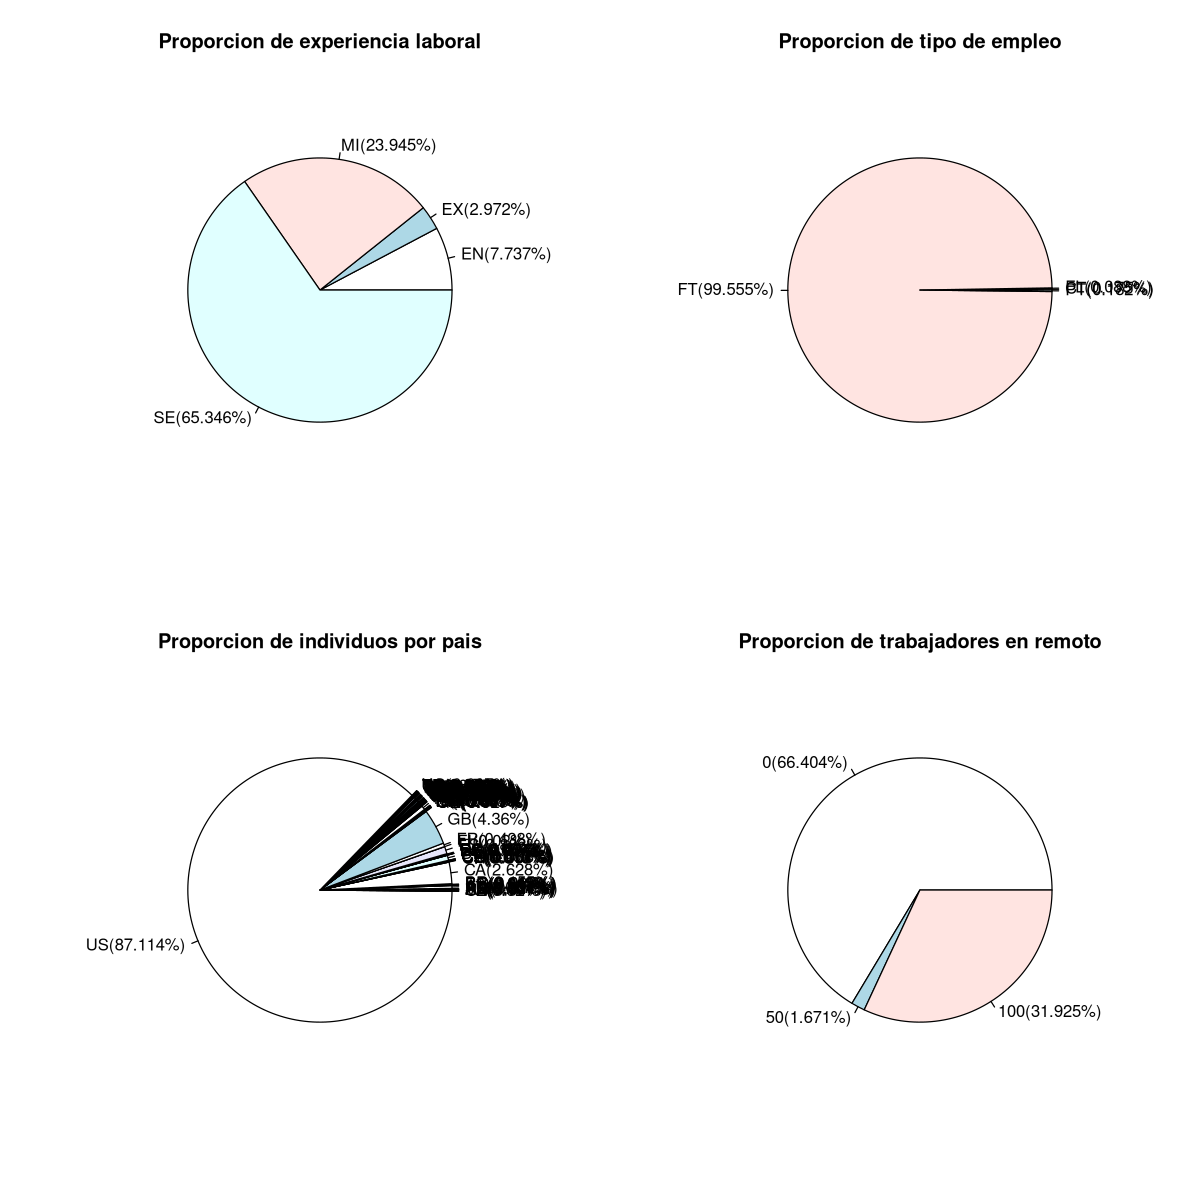

In [62]:
options(repr.plot.width=10, repr.plot.height=12)
par(mfrow=c(2, 2))
emp.names <- c('experience_level', 'employment_typem', 'employee_residence', 'remote_ratio')
names_esp <- c('experiencia laboral', 'tipo de empleo',  'individuos por pais', 'trabajadores en remoto')

var <- c(2, 3, 8, 9)

for (i in 1:4) {

    k <- df.comp[ , var[i]]
#Primero calculamos la proporcion del nivel de la variable categorica
options(repr.plot.width=10, repr.plot.height=10)
prop <- round(table(k)/length(k), 5)

labels <- c()
for (j in 1:length(unique(k))) {
    labels <- c(labels, paste0( names(prop)[j], '(', prop[j]*100, '%)') )
    }
labels
pie(table(k), labels = labels, radius = 0.75, main = paste0('Proporcion de ', names_esp[i]))
}


Podemos ver que en todos hay 1 o 2 valores que predominan claramente:

* Vemos que casi todos, por no decir todos, los individuos de la muestra tienen un trabajo a tiempo completo, mas del 99%, y casi todos los empleados son Estadounidenses, cerca del 90%. Exceptuando estadounidenses, destacan los britanicaos y canadienses, completando el 93% de la muestra.
* A la hora de ver la experiencia de los individuos, se ve que cuanta mayor es la experiencia, mas puestos abarcan. Al contrario, a la hora de ver puestos en remoto, no vemos que cuanto menos tiempo presencial haya menos individuos hay: en general, o tienen un trabajo presencial o uno remoto, no hay apenas individuos con uno parcial.

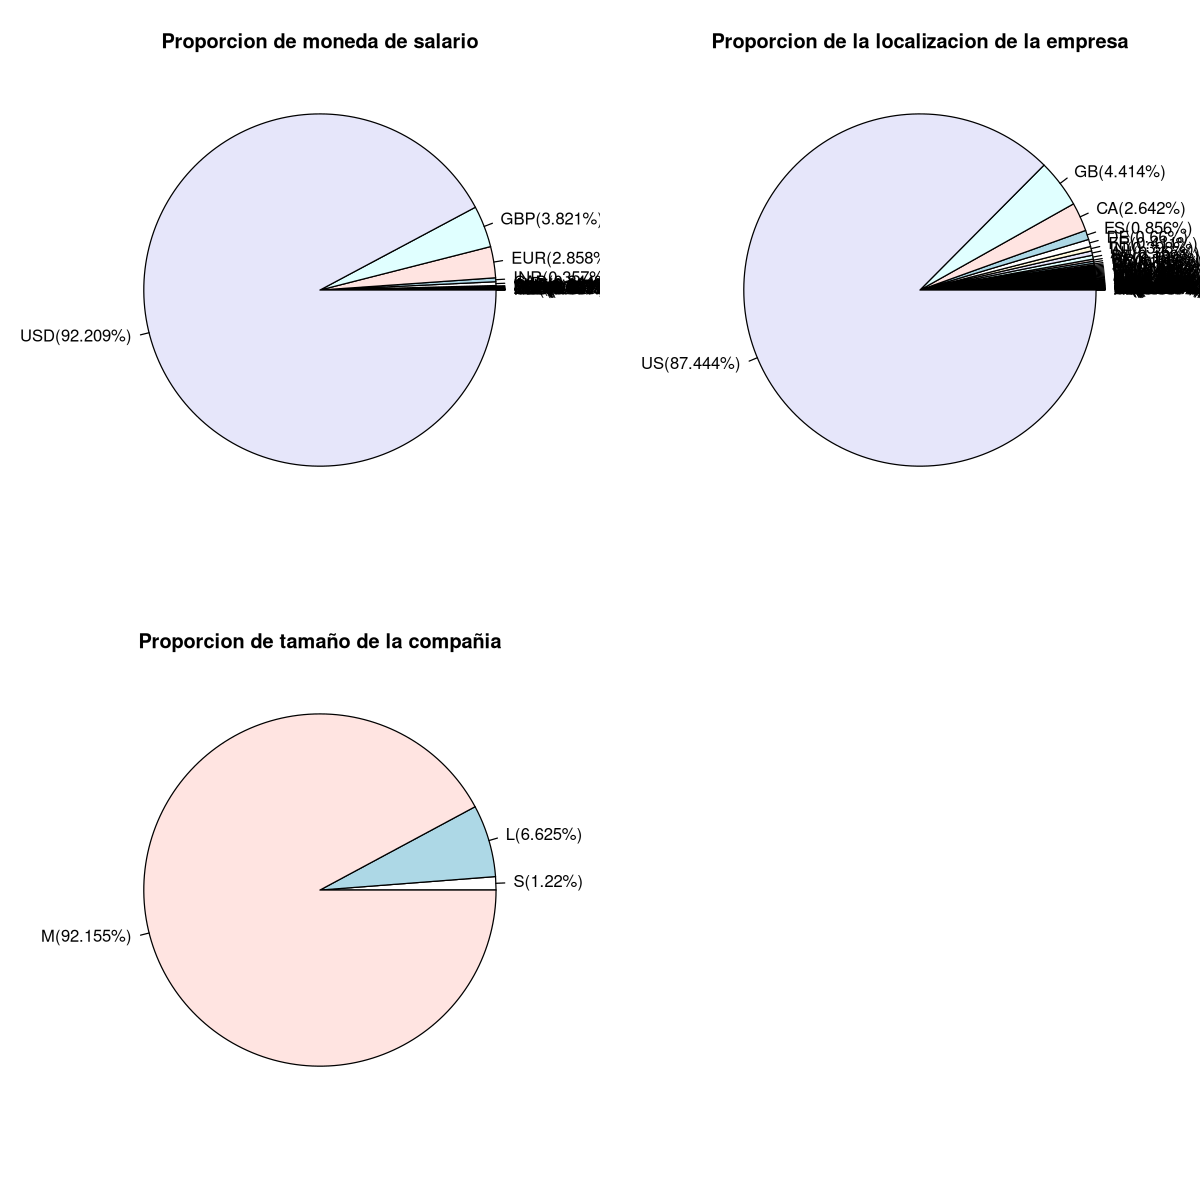

In [68]:
options(jupyter.plot_scale = NULL)  # Restablece jupyter.plot_scale a su valor por defecto
options(repr.plot.width = 10, repr.plot.height = NULL)  # Restablece las dimensiones de gráficos
       
par(mfrow=c(2, 2))
emp.names <- c('salary_currency', 'company_location', 'company_size')
names_esp <- c('moneda de salario', 'la localizacion de la empresa', 'tamaño de la compañia')

var <- c(6, 10, 11)

for (i in 1:3) {

    k <- df.comp[ , var[i]]
#Primero calculamos la proporcion del nivel de la variable categorica
options(repr.plot.width=10, repr.plot.height=10)
prop <- round(sort(table(k))/length(k), 5)

labels <- c()
for (j in 1:length(unique(k))) {
    labels <- c(labels, paste0( names(prop)[j], '(', prop[j]*100, '%)') )
    }
labels
pie(sort(table(k)), labels = labels, radius =1, main = paste0('Proporcion de ', names_esp[i]))
}


Como era de esperar, la mayoria de empresas y meodos de pago son estadounidenses o de reino unido. 
Revisando las empresas, vemos que casi la totalidad de las empresas son medianas. 

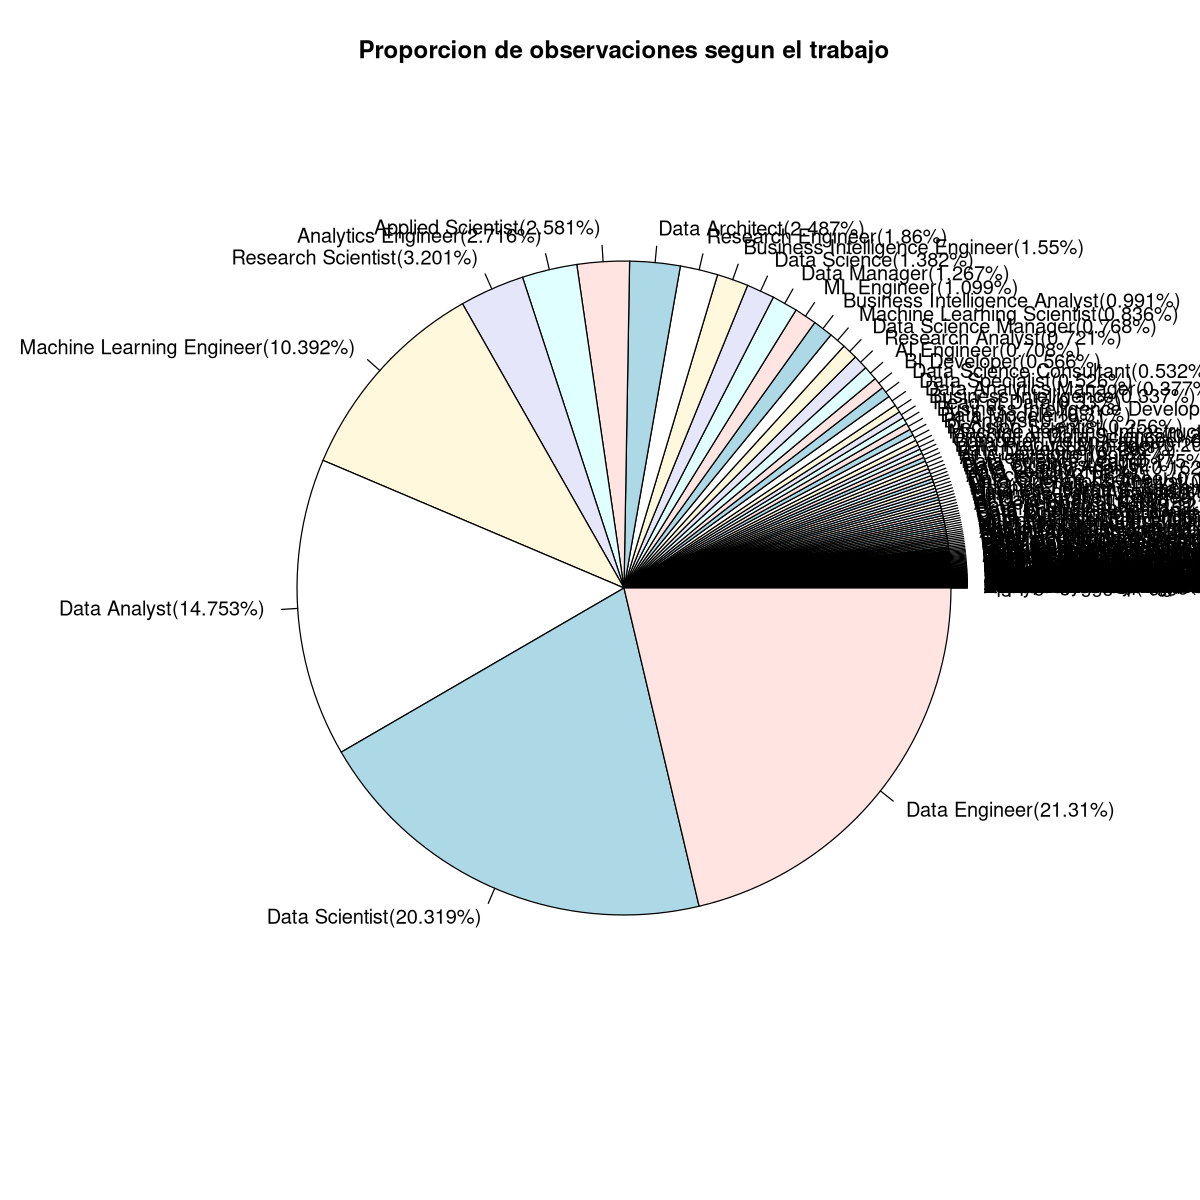

In [67]:
#Primero calculamos la proporcion del nivel de la variable categorica
options(repr.plot.width=10, repr.plot.height=10)
prop <- round(sort(table(job_title))/length(job_title), 5)

labels <- c()
for (i in 1:length(unique(job_title))) {
    labels <- c(labels, paste0( names(prop)[i], '(', prop[i]*100, '%)') )
    }

pie(sort(table(job_title)), labels = labels, radius = 0.75, main = 'Proporcion de observaciones segun el trabajo')
   

Podemos ver que dentro de todas las 153 profesiones, hay 4 que destacan sobre el resto: Ingeniero de datos, analista de datos, cientifico de datos y ingeniero en machine learning, abarcando mas de la mitad de los individuos.

## Analisis del salario

Primero de todo, no podemos comparar la fila salario, ya que esta en distintas uniades, por ello usaremos la variable salary_usd.


Para un primer vistazo, clasificaremos segun la variable experience_level, ya que, suponemos que a mayor nivel experiencia, mayor sueldo va a tener.

In [71]:

df.se <- df.comp[df.comp$experience_level == 'SE', ]
df.mi <- df.comp[df.comp$experience_level == 'MI', ]
df.ex <- df.comp[df.comp$experience_level == 'EX', ]
df.en <- df.comp[df.comp$experience_level == 'EN', ]

Vamos a comprobar como varian entre ellos los salarios:

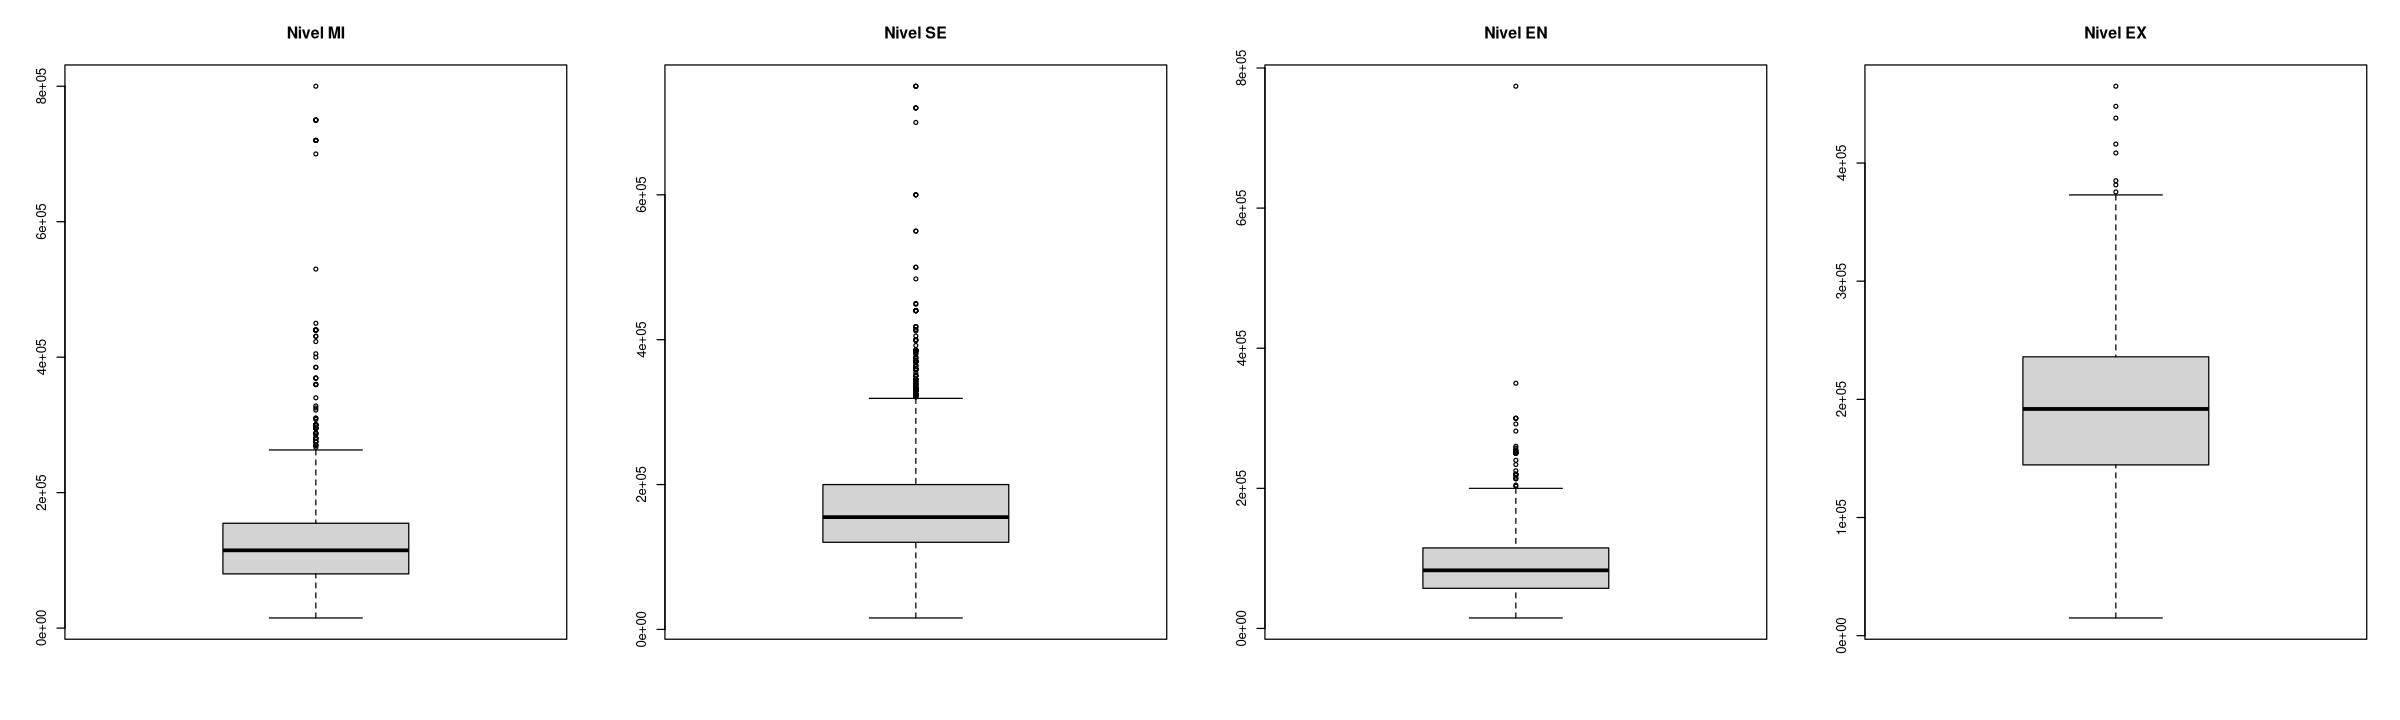

In [109]:
box_experience(df.comp)

Nos podemos encontrar una gran cantidad de datos atipicos. Esto puede llegar a resultar normal, si nos gijamos, el nivel que mas cantidad de atipicos presenta es SE, ya que son los mas formados y es normal que haya gente que gane mucho mas de lo normal.

Vamos a buscar analizar los salarios pagados en euros de empresas españolas.

In [25]:
salarios_ESP <- df.comp[ df.comp$employee_residence == 'ES'& df.comp$salary_currency == 'EUR' & df.comp$company_location =='ES',  ] 
head(salarios_ESP)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,salary_in_eur,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>
9201,2024,MI,FT,Machine Learning Engineer,125800,EUR,139777,148163.62,ES,100,ES,M
11621,2024,EX,FT,Data Science Director,96000,EUR,106666,113065.96,ES,100,ES,L
11622,2024,EX,FT,Data Science Director,96000,EUR,106666,113065.96,ES,100,ES,L
12413,2023,SE,FT,Principal Data Engineer,85000,EUR,91773,97279.38,ES,100,ES,M
12511,2024,MI,FT,Machine Learning Engineer,83900,EUR,93222,98815.32,ES,100,ES,M
12784,2023,SE,FT,Principal Data Scientist,80000,EUR,86374,91556.44,ES,100,ES,L


Primero, trabajaremos con los salarios de empresas ubicadas en españa, con salario en euros y empleados españoles. Si quitamos la condicion de que los trabajadores sean españoles no varia apenas el numero de observaciones, por eso dejamos solo a los españoles.



In [132]:
dfe.se <- salarios_ESP[salarios_ESP$experience_level == 'SE', ]
dfe.mi <- salarios_ESP[salarios_ESP$experience_level == 'MI', ]
dfe.ex <- salarios_ESP[salarios_ESP$experience_level == 'EX', ]
dfe.en <- salarios_ESP[salarios_ESP$experience_level == 'EN', ]

color_exp <- c('green', 'blue', 'yellow', 'purple')

Vamos a volver a ver como varian los salarios:

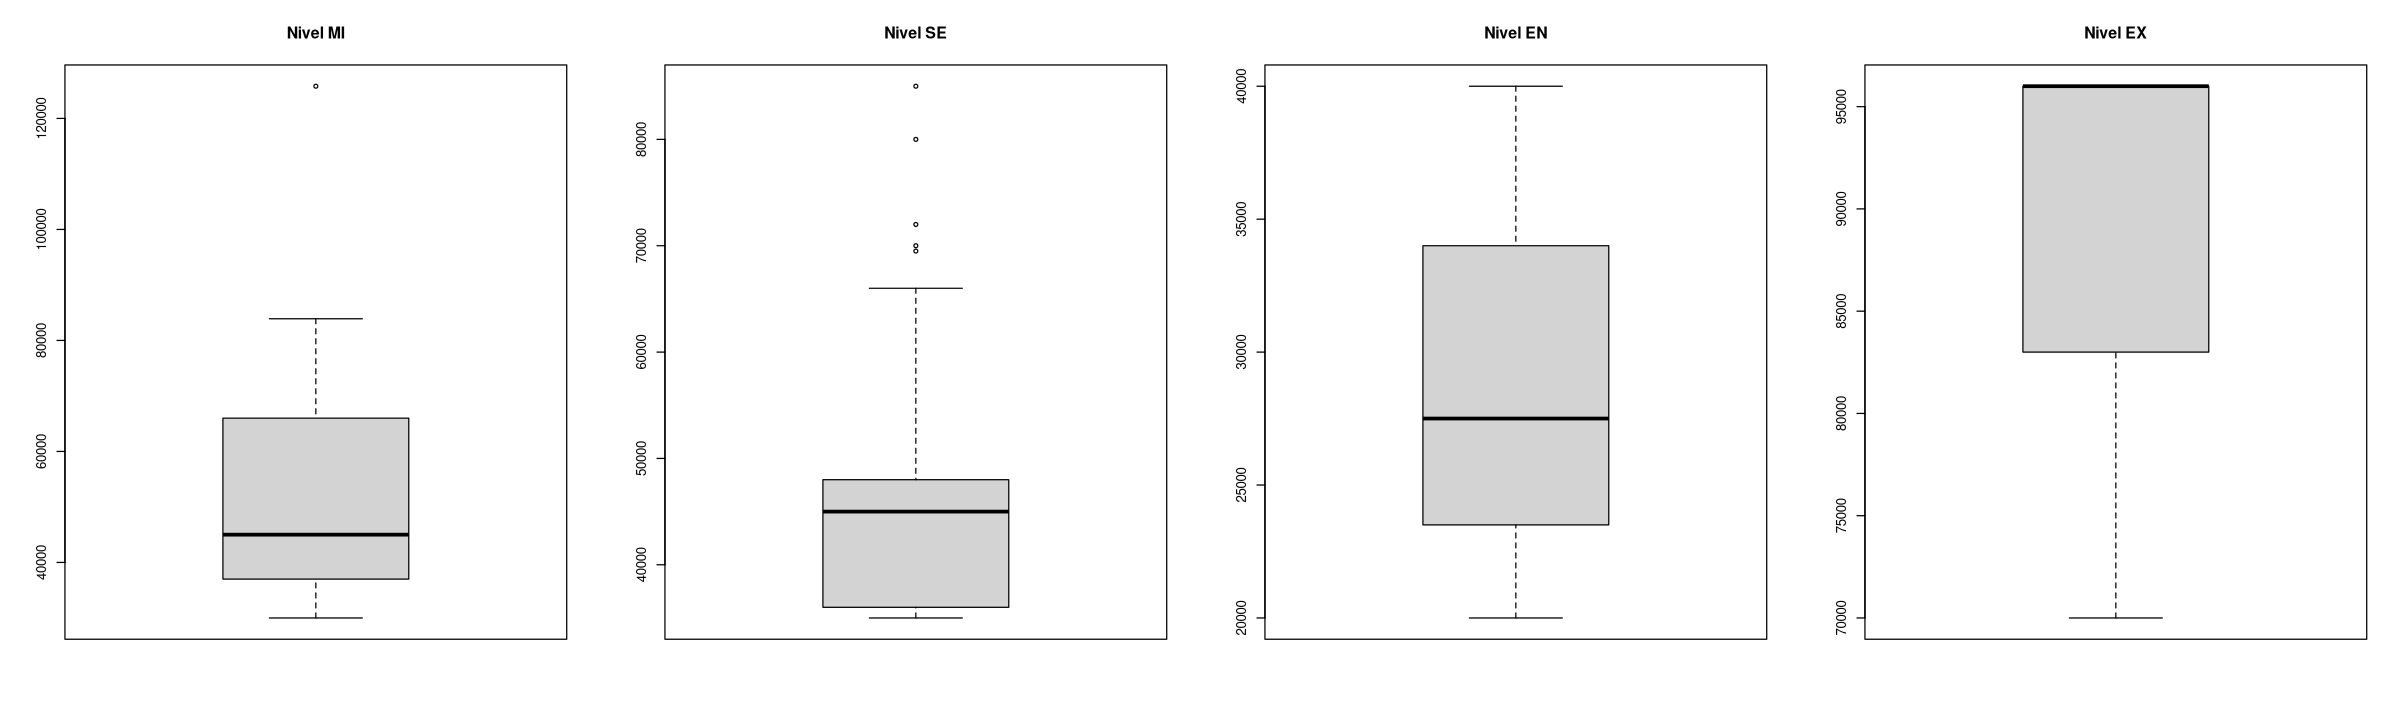

In [123]:
box_experience_esp(salarios_ESP)

Aqui nos encontramos varias cosas que nos llaman la atencion:

* No hay tanta presencia de datos atipicos, aun asi, como esperabamos, hay mas atipicos segun aumenta la experiencia de la persona, y, son siempre atipicos superiores a la media. 
* A contradiccion de lo anterior, en la grafica de los expertos deberia de haber muchos atipicos. No los hay debido a la falta de datos en la muestra, habiendo solo 3 individuos que cumplen estas condiciones
* Cabe destacar que la media y la mediana difieren significativamente en casi todas las graficas. Esto se puede deber a la aparicion de atipicos

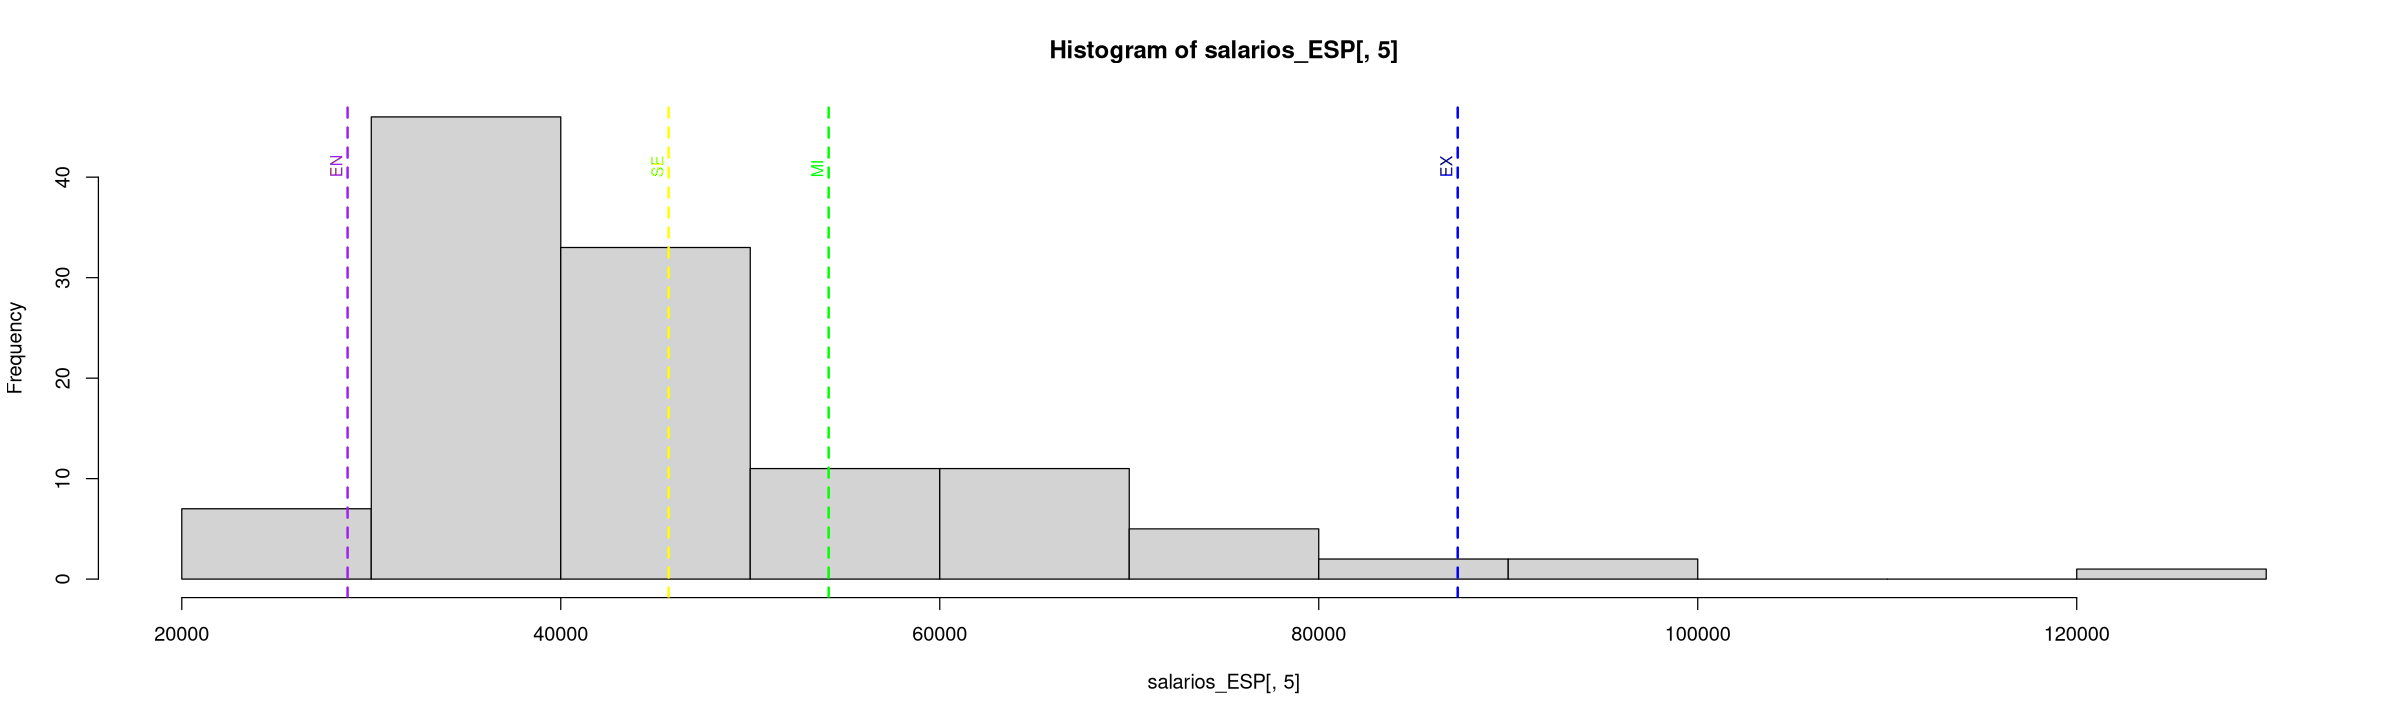

In [153]:
hist(salarios_ESP[, 5])
for (i in 1:4){
    mean_exp <- mean(salarios_ESP[salarios_ESP$experience_level == unique(salarios_ESP$experience_level)[i], 5])
    abline(v = mean_exp, col = color_exp[i], lwd = 2, lty = 2)
    
     text(x = mean_exp-600, 
         y = 40,  # Coloca el texto justo sobre el borde inferior
         labels = unique(salarios_ESP$experience_level)[i], 
         col = color_exp[i], cex = 0.8, srt = 90, adj = 0)
    }

In [160]:
mean(salarios_ESP[salarios_ESP$experience_level == 'MI', 5])

[1] 54136.67

In [ ]:
salarios_ESP$experience_level

In [154]:
ss20 <- salarios_ESP [salarios_ESP$work_year == '2020', 7]
ss21 <- salarios_ESP [salarios_ESP$work_year == '2021', 7]
ss22 <- salarios_ESP [salarios_ESP$work_year == '2022', 7]
ss23 <- salarios_ESP [salarios_ESP$work_year == '2023', 7]
ss24 <- salarios_ESP [salarios_ESP$work_year == '2024', 7]

